# Using scikit-learn

As a data set, we use loan applications on a crowdfunding site. Each feature vector is of length 15, indicating factors such as the amount requested, the interest rate, the applicant's annual income, etc. The goal is to predict whether the loan is at least partly funded.

In order to work with vectors and matrices, which are both types of arrays, we will use the `numpy` package.

In [1]:
import numpy as np
X = np.loadtxt("data.csv",delimiter=",")
print("feature matrix has shape",X.shape)
y = np.loadtxt("labels.csv",delimiter=",")
print("label vector has shape",y.shape)

feature matrix has shape (4140, 15)
label vector has shape (4140,)


Let's look at the first 5 features of the first instance.

In [2]:
X[0,:5]

array([3.600e+03, 2.375e+03, 7.631e+01, 3.000e+04, 1.504e+01])

And here are the last 6 labels.

In [3]:
y[-6:]

array([-1., -1., -1., -1., -1., -1.])

A label $-1$ indicates that the loan was funded, while $1$ indicates that it was rejected.

We will use the `scikit-learn` package to get familiar with classifiers. There are three main activities in this package:

* **fit**, to train the classifier
* **predict**, to apply the classifier
* **transform**, to modify the data

Let's try a classifier whose characteristics we will explain in a future section.

In [4]:
from sklearn import neighbors as nbr 
knn = nbr.KNeighborsClassifier(n_neighbors=11)   # specification
knn.fit(X,y)   # training
yhat = knn.predict(X)   # prediction

yhat[-6:]

array([-1., -1., -1., -1., -1., -1.])

Compared to the original labels above, so far, so good. How often is the classifier correct? We simply count up the number of correctly predicted labels and then divide by the total number of labels, $n$.

In [5]:
n = len(y)
acc = sum(yhat==y)/n   # or, acc = knn.score(X,y)
print(f"accuracy is {acc:.1%}")

accuracy is 83.2%


Is that good? That turns out to be a complicated question. The vast majority of loans were funded:

In [6]:
funded = sum(y==-1)
print(f"{funded/n:.1%} were funded")

81.6% were funded


Therefore, an algorithm that simply "predicted" funding every loan would do nearly as well as ours!

## Measuring classifier performance

To fully understand the performance of a classifier, we have to account for four cases:

* True positives (TP): Predicts "yes", actually is "yes"
* False positives (FP): Predicts "yes", actually is "no"
* True negatives (TN): Predicts "no", actually is "no"
* False negatives (FN): Predicts "no", actually is "yes"

The four cases correspond to a 2×2 table according to the states of the prediction and *ground truth*, which is the accepted correct value. The table can be filled with counts or percentages of tested instances, to create a **confusion matrix**, as illustrated in {numref}`fig-supervised-confusion`. 

```{figure} confusion.svg
---
name: fig-supervised-confusion
---
Confusion matrix
```

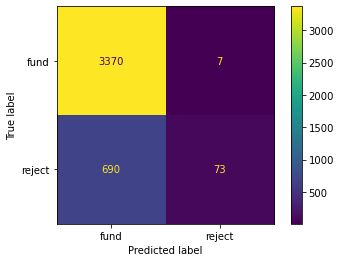

In [7]:
from sklearn import metrics
C = metrics.confusion_matrix(y,yhat,labels=[-1,1])
lbl = ["fund","reject"]
metrics.ConfusionMatrixDisplay(C,display_labels=lbl).plot()

Hence there are 3370 true positives (funded) and 73 true negatives (rejected). Therefore, the **accuracy** is 

$$
\newcommand{TP}{\text{TP}}
\newcommand{FP}{\text{FP}}
\newcommand{TN}{\text{TN}}
\newcommand{FN}{\text{FN}}
\text{accuracy} = \frac{\TP + \TN}{n} = \frac{3443}{4140} = 0.83164\ldots,
$$

i.e., 83.2%. However, there are four other quantities defined by putting a "number correct" value in the numerator and a sum of a row or column in the denominator:

$$
\text{recall (aka sensitvity)} &= \frac{\TP}{\TP + \FN} \\[2mm]
\text{specificity} &= \frac{\TN}{\TN + \FP} \\[2mm] 
\text{precision} &= \frac{\TP}{\TP + \FP} \\[2mm] 
\text{negative predictive value (NPV)} &= \frac{\TN}{\TN + \FN} \\ 
$$

In words, these metrics answer the following questions:

* **recall** How often are actual "yes" cases predicted correctly?
* **specificity** How often are actual "no" cases predicted correctly?
* **precision** How often are the "yes" predictions correct?
* **NPV** How often are the "no" predictions correct?

For our loan classifier, here are the scores:

In [8]:
TP,FN,FP,TN = C.ravel()
print(f"recall = {TP/(TP+FN):.1%}")
print(f"specificity = {TN/(TN+FP):.1%}")
print(f"precision = {TP/(TP+FP):.1%}")
print(f"NPV = {TN/(TN+FN):.1%}")

recall = 99.8%
specificity = 9.6%
precision = 83.0%
NPV = 91.2%


The recall is almost perfect: virtually nobody who should get a loan will go away disappointed. However, the low specificity would be concerning to those doing the funding, because nine in ten applicants who should be denied will be funded as well.

We could make the performance seemingly a lot better by changing how the classifier is set up.

In [9]:
knn = nbr.KNeighborsClassifier(n_neighbors=1) 
knn.fit(X,y)  
yhat = knn.predict(X) 

C = metrics.confusion_matrix(y,yhat,labels=[-1,1])
print(C)

[[3377    0]
 [   0  763]]


By every one of our measures, this is perfect performance! However, our enthusiasm has to be kept in check. Thus far we are only testing the performance on the training data. Will it work well on new instances? We consider that question next.